# Introduction
> Recent Covid-19 Pandemic has raised alarms over one of the most overlooked area to focus: Healthcare Management. While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.
This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to miminize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning.

In [1]:
import numpy as np
import pandas as pd

# Import Dataframes

In [2]:
files_path = '../input/dataset/'
train_df = pd.read_csv('{}healthcare/train_data.csv'.format(files_path))
test_df = pd.read_csv('{}healthcare/test_data.csv'.format(files_path))
y_test_df = pd.read_csv('{}healthcare/sample_sub.csv'.format(files_path))
data_dict = pd.read_csv('{}healthcare/train_data_dictionary.csv'.format(files_path))

In [3]:
train_df.head()

case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
0        1              8                  c                   3   
1        2              2                  c                   5   
2        3             10                  e                   1   
3        4             26                  b                   2   
4        5             26                  b                   2   

  Hospital_region_code  Available Extra Rooms in Hospital    Department  \
0                    Z                                  3  radiotherapy   
1                    Z                                  2  radiotherapy   
2                    X                                  2    anesthesia   
3                    Y                                  2  radiotherapy   
4                    Y                                  2  radiotherapy   

  Ward_Type Ward_Facility_Code  Bed Grade  patientid  City_Code_Patient  \
0         R                  F        2.0      31397                7.0   
1         S                  F        2.0      31397                7.0   
2         S                  E        2.0      31397                7.0   
3         R                  D        2.0      31397                7.0   
4         S                  D        2.0      31397                7.0   

  Type of Admission Severity of Illness  Visitors with Patient    Age  \
0         Emergency             Extreme                      2  51-60   
1            Trauma             Extreme                      2  51-60   
2            Trauma             Extreme                      2  51-60   
3            Trauma             Extreme                      2  51-60   
4            Trauma             Extreme                      2  51-60   

   Admission_Deposit   Stay  
0             4911.0   0-10  
1             5954.0  41-50  
2             4745.0  31-40  
3             7272.0  41-50  
4             5558.0  41-50

In [4]:
pd.set_option('display.max_colwidth', None)
data_dict.head(18)

Column  \
0                             case_id   
1                       Hospital_code   
2                  Hospital_type_code   
3                  City_Code_Hospital   
4                Hospital_region_code   
5   Available Extra Rooms in Hospital   
6                          Department   
7                           Ward_Type   
8                  Ward_Facility_Code   
9                           Bed Grade   
10                          patientid   
11                  City_Code_Patient   
12                  Type of Admission   
13                Severity of Illness   
14              Visitors with Patient   
15                                Age   
16                  Admission_Deposit   
17                               Stay   

                                                  Description  
0                              Case_ID registered in Hospital  
1                                Unique code for the Hospital  
2                        Unique code for the type of Hospital  
3                                   City Code of the Hospital  
4                                 Region Code of the Hospital  
5             Number of Extra rooms available in the Hospital  
6                             Department overlooking the case  
7                                      Code for the Ward type  
8                                  Code for the Ward Facility  
9                                Condition of Bed in the Ward  
10                                          Unique Patient Id  
11                                  City Code for the patient  
12                  Admission Type registered by the Hospital  
13  Severity of the illness recorded at the time of admission  
14                        Number of Visitors with the patient  
15                                         Age of the patient  
16                              Deposit at the Admission Time  
17                                   Stay Days by the patient

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

$\color{green}{\text{
  some columns names contain spaces which can't be accessed by dot notation
}}$

In [6]:
test_df.head()

case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
0   318439             21                  c                   3   
1   318440             29                  a                   4   
2   318441             26                  b                   2   
3   318442              6                  a                   6   
4   318443             28                  b                  11   

  Hospital_region_code  Available Extra Rooms in Hospital  Department  \
0                    Z                                  3  gynecology   
1                    X                                  2  gynecology   
2                    Y                                  3  gynecology   
3                    X                                  3  gynecology   
4                    X                                  2  gynecology   

  Ward_Type Ward_Facility_Code  Bed Grade  patientid  City_Code_Patient  \
0         S                  A        2.0      17006                2.0   
1         S                  F        2.0      17006                2.0   
2         Q                  D        4.0      17006                2.0   
3         Q                  F        2.0      17006                2.0   
4         R                  F        2.0      17006                2.0   

  Type of Admission Severity of Illness  Visitors with Patient    Age  \
0         Emergency            Moderate                      2  71-80   
1            Trauma            Moderate                      4  71-80   
2         Emergency            Moderate                      3  71-80   
3            Trauma            Moderate                      3  71-80   
4            Trauma            Moderate                      4  71-80   

   Admission_Deposit  
0             3095.0  
1             4018.0  
2             4492.0  
3             4173.0  
4             4161.0

In [7]:
y_test_df.head()

case_id  Stay
0   318439  0-10
1   318440  0-10
2   318441  0-10
3   318442  0-10
4   318443  0-10

In [8]:
train_df.Stay.value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [9]:
train_df.Stay.nunique()

11

$\color{green}{\text{'Stay' labeles are in 11 imbalanced classes, which will reduce model training performance}}$

In [10]:
y_test_df.Stay.value_counts()

0-10    137057
Name: Stay, dtype: int64

$\color{red}{\text{
train data has 11 classes while test data has only 1 class
}}$

In [11]:
y_test_df.shape

(137057, 2)

$\color{green}{\text{
test data is really large amount of data, so it will be merged with train data to be split before model train
}}$

# Repair data

*   Merge all data sets in one data frame
*   Replace spaces in columns

## Merge Datasets

In [12]:
# merge test features and labeles
test_df = test_df.merge(y_test_df, how='inner', left_on=['case_id'], right_on=['case_id'])

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137057 entries, 0 to 137056
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  int64  
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  int64  
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137022 non-null  float64
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient                  1349

In [14]:
# create new dataframe contains train and test datasets
df = train_df.append(test_df)

In [15]:
# check fro duplicates in case_id
df.case_id.is_unique

True

## Repair Columns Names


> replace spaces in columns names with undescore "_" so it can be accessed by dot notation "."



In [16]:
# replace spaces with "-"
df.columns = df.columns.str.replace(' ','_')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 0 to 137056
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            455495 non-null  int64  
 1   Hospital_code                      455495 non-null  int64  
 2   Hospital_type_code                 455495 non-null  object 
 3   City_Code_Hospital                 455495 non-null  int64  
 4   Hospital_region_code               455495 non-null  object 
 5   Available_Extra_Rooms_in_Hospital  455495 non-null  int64  
 6   Department                         455495 non-null  object 
 7   Ward_Type                          455495 non-null  object 
 8   Ward_Facility_Code                 455495 non-null  object 
 9   Bed_Grade                          455347 non-null  float64
 10  patientid                          455495 non-null  int64  
 11  City_Code_Patient                  4488

# Exploratory DA

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [18]:
count = 1

In [19]:
eda_df = df.copy()

In [20]:
plot_df = eda_df.Stay.value_counts().sort_values(ascending=False)
fig = px.bar(plot_df, x=plot_df.index, y=plot_df, color='Stay',
             labels={'index':'Duration', 'y':'Count'}, height=500, width=900, color_continuous_scale=px.colors.sequential.Sunset)
fig.update_layout(title="Count of patients in each duration category")
fig.show()



$\color{green}{\text{
35% of patients stay up to 10
}}$

in order to perform better analysis, stay durations will be regrouped into 3 durations

In [21]:
stay_values_mapping = {
 '11-20': '11-30',
 '21-30': '11-30',
 '31-40': '30+',
 '41-50': '30+',
 '51-60': '30+',
 '61-70': '30+',
 '71-80': '30+',
 '81-90': '30+',
 '91-100': '30+',
 'More than 100 Days': '30+'
}

In [22]:
grouped_duration = eda_df.copy()
grouped_duration.Stay.replace(stay_values_mapping, inplace=True)

In [23]:
plot_df = grouped_duration.Stay.value_counts().sort_values(ascending=False)
fig = px.bar(plot_df, x=plot_df.index, y=plot_df, color='Stay',
             labels={'index':'Duration', 'y':'Count'}, height=400, width=600, color_continuous_scale=px.colors.sequential.Sunset)
fig.update_layout(title="Count of patients in each duration category")
fig.show()



$\color{green}{\text{
Durations are regrouped in almost balanced three categories
}}$

In [24]:
fig = px.sunburst(eda_df, path=['Severity_of_Illness'], height=600, width=600)
fig.update_layout(title='Severity of Illness')
fig.update_traces(textinfo='label+percent entry')
fig.show()




$\color{green}{\text{
55% of patients admitted in moderate severity of illness
}}$

In [25]:
fig = px.sunburst(eda_df, path=['Type_of_Admission'], height=600, width=600)
fig.update_layout(title='Type of Admission')
fig.update_traces(textinfo='label+percent entry')
fig.show()



$\color{green}{\text{
48% of patients in trauma admission
}}$

In [26]:
plot_df = eda_df.Department.value_counts(normalize=True).sort_values(ascending=False) * 100
fig = px.bar(plot_df, x=plot_df.index, y=plot_df, color='Department',
             labels={'index':'Department', 'y':'Percentage'}, height=500, width=900, color_continuous_scale=px.colors.sequential.Sunset)
fig.update_layout(title="Percentage of patients admitted in each department")
fig.show()



$\color{green}{\text{
78% of patients admitted in gynecology department
}}$

In [27]:
fig = px.sunburst(grouped_duration, path=['Stay', 'Severity_of_Illness'], height=600, width=600)
fig.update_layout(title='Severity of Illness vs Duration')
fig.update_traces(textinfo='label+percent parent')
fig.show()



In [28]:
fig = px.sunburst(eda_df, path=['Type_of_Admission', 'Severity_of_Illness'], height=600, width=600)
fig.update_layout(title='Severity of Illness vs Type of Admission')
fig.update_traces(textinfo='label+percent parent')
fig.show()



$\color{green}{\text{
severity of illnes is distriputed over durations and type of admission almost as it is distriputed over all data
}}$

In [29]:
plot_df = df.Age.value_counts().sort_index()
fig = px.bar(plot_df, x=plot_df.index, y=plot_df, color='Age',
             labels={'y': 'Count', 'index':'Age'}, height=400, width=800, color_continuous_scale=px.colors.sequential.Sunset)
fig.update_layout(title="Count of patients in each age category")
fig.show()



$\color{green}{\text{
most of admitted patients are between 31 and 50 years old
}}$

In [30]:
age_mapping = {
'0-10': '0-30',
'11-20': '0-30',
'21-30': '0-30',
'31-40': '31-60',
'41-50': '31-60',
'51-60': '31-60',
'61-70': '61-100',
'71-80': '61-100',
'81-90': '61-100',
'91-100':'61-100'
}

grouped_age_duration = grouped_duration.copy()
grouped_age_duration.Age.replace(age_mapping, inplace=True)

In [31]:
fig = px.sunburst(grouped_age_duration, path=['Stay', 'Age'], height=600, width=600)
fig.update_layout(title='Age vs Stay Duration')
fig.update_traces(textinfo='label+percent parent')
fig.show()



1. $\color{green}{\text{
percentage of patients between 61-100 years old increases in saty duration more than 30 days slightly
}}$

1. $\color{green}{\text{
percentage of patients between 0-30 years old decreases by the same amount
}}$

1. $\color{green}{\text{
percentage of patients between 31-60 years is constant over all stay duration categories
}}$

In [32]:
plot_df = df.groupby('Department')['Visitors_with_Patient'].mean()
fig = px.bar(plot_df, x=plot_df.index, y=plot_df, color='Visitors_with_Patient',
             labels={'y': 'Visitors Average'}, height=400, width=700, color_continuous_scale=px.colors.sequential.Sunset)
fig.update_layout(title='Visitors average in each department')
fig.show()



$\color{green}{\text{
  patients in all departments have visitors of 3 in average
}}$

In [33]:
plot_df = eda_df.groupby('Department')['Available_Extra_Rooms_in_Hospital'].mean()
fig = px.bar(plot_df, x=plot_df.index, y=plot_df, color='Available_Extra_Rooms_in_Hospital',
             labels={'y': 'Extra Rooms Average'}, height=400, width=800, color_continuous_scale=px.colors.sequential.Sunset)
fig.update_layout(title='Extra rooms average in each department')
fig.show()



$\color{green}{\text{
each department has in average 3 extra rooms at admission time
}}$

In [34]:
eda_df.Admission_Deposit.describe()

count    455495.000000
mean       4877.434022
std        1084.982089
min        1800.000000
25%        4184.000000
50%        4738.000000
75%        5405.000000
max       11920.000000
Name: Admission_Deposit, dtype: float64

In [35]:
eda_df.Admission_Deposit.mode()[0]

4469.0

In [36]:
x = eda_df.Admission_Deposit
fig = px.histogram(x=x, histnorm='percent', template='ggplot2', height=400, width=700, labels={'x': 'Admission_Deposit'})
fig.update_layout(title='Admission Deposit Histogram')
fig.show()



$\color{green}{\text{
most admission deposits are between 3k and 6k
}}$

In [37]:
eda_df.Visitors_with_Patient.describe()

count    455495.000000
mean          3.284229
std           1.768044
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          32.000000
Name: Visitors_with_Patient, dtype: float64

In [38]:
eda_df.Visitors_with_Patient.mode()[0]

2

In [39]:
x = eda_df.Visitors_with_Patient
fig = px.histogram(x=x, histnorm='percent', template='ggplot2', height=400, width=700, labels={'x': 'Visitors_with_Patient'})
fig.update_layout(title='Visitors Histogram')
fig.show()



$\color{green}{\text{
most number of visitors between 2 and 4
}}$

In [40]:
eda_df.Available_Extra_Rooms_in_Hospital.describe()

count    455495.000000
mean          3.196140
std           1.166994
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          24.000000
Name: Available_Extra_Rooms_in_Hospital, dtype: float64

In [41]:
eda_df.Available_Extra_Rooms_in_Hospital.mode()[0]

2

In [42]:
x = eda_df.Available_Extra_Rooms_in_Hospital
fig = px.histogram(x=x, histnorm='percent', template='ggplot2', height=400, width=700, labels={'x': 'Available_Extra_Rooms_in_Hospital'})
fig.update_layout(title='Extra Rooms Histogram')
fig.show()



$\color{green}{\text{
most number of extra rooms between 2 and 4
}}$

# Data Preprocessing

> Missing values, label encoding



## Regroup 'Stay' labeles

In [43]:
set(train_df.Stay.values)

{'0-10',
 '11-20',
 '21-30',
 '31-40',
 '41-50',
 '51-60',
 '61-70',
 '71-80',
 '81-90',
 '91-100',
 'More than 100 Days'}

In [44]:
df.Stay.value_counts()

0-10                  160661
21-30                  87491
11-20                  78139
31-40                  55159
51-60                  35018
41-50                  11743
71-80                  10254
More than 100 Days      6683
81-90                   4838
91-100                  2765
61-70                   2744
Name: Stay, dtype: int64

In [45]:
stay_values_mapping = {
 '11-20': '11-30',
 '21-30': '11-30',
 '31-40': '30+',
 '41-50': '30+',
 '51-60': '30+',
 '61-70': '30+',
 '71-80': '30+',
 '81-90': '30+',
 '91-100': '30+',
 'More than 100 Days': '30+'
}

In [46]:
df.Stay.replace(stay_values_mapping, inplace=True)

## Missing Values

In [47]:
# check missing values
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                             148
patientid                               0
City_Code_Patient                    6689
Type_of_Admission                       0
Severity_of_Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

<AxesSubplot:>

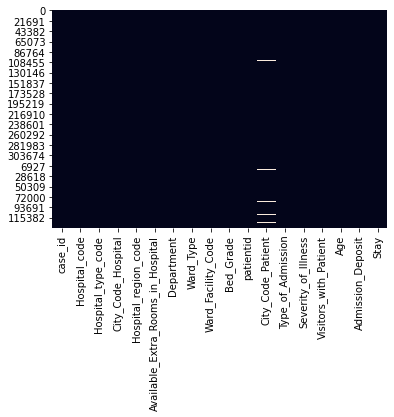

In [48]:
# missing value heat map
sns.heatmap(df.isnull(), cbar=False)



In [49]:
(df.City_Code_Patient.isnull().sum() / df.shape[0]) * 100

1.468512277851568

$\color{green}{\text{
misisng values are 1.4% of data, so it will be removed
}}$

In [50]:
df.shape[0] - df.dropna().shape[0]

6837

In [51]:
df.dropna().shape[0] / df.shape[0]

0.9849899559819537

In [52]:
# drop missing values
df = df.dropna()
df.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors_with_Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

## Label Encoding

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
object_cols = df.select_dtypes(include='object').columns.to_list()
num_cols = df.drop(object_cols, axis=1).columns
object_cols.remove('Stay')

In [55]:
# convert object data to numerical using label encoding
les = {}
for col in object_cols:
  les[col] = LabelEncoder()
  data = df[col].values
  df[col]  = les[col].fit_transform(data)
  print("{}: {} \n".format(col, les[col].classes_))

Hospital_type_code: ['a' 'b' 'c' 'd' 'e' 'f' 'g'] 

Hospital_region_code: ['X' 'Y' 'Z'] 

Department: ['TB & Chest disease' 'anesthesia' 'gynecology' 'radiotherapy' 'surgery'] 

Ward_Type: ['P' 'Q' 'R' 'S' 'T' 'U'] 

Ward_Facility_Code: ['A' 'B' 'C' 'D' 'E' 'F'] 

Type_of_Admission: ['Emergency' 'Trauma' 'Urgent'] 

Severity_of_Illness: ['Extreme' 'Minor' 'Moderate'] 

Age: ['0-10' '11-20' '21-30' '31-40' '41-50' '51-60' '61-70' '71-80' '81-90'
 '91-100'] 



## Correlation Matrix

<AxesSubplot:>

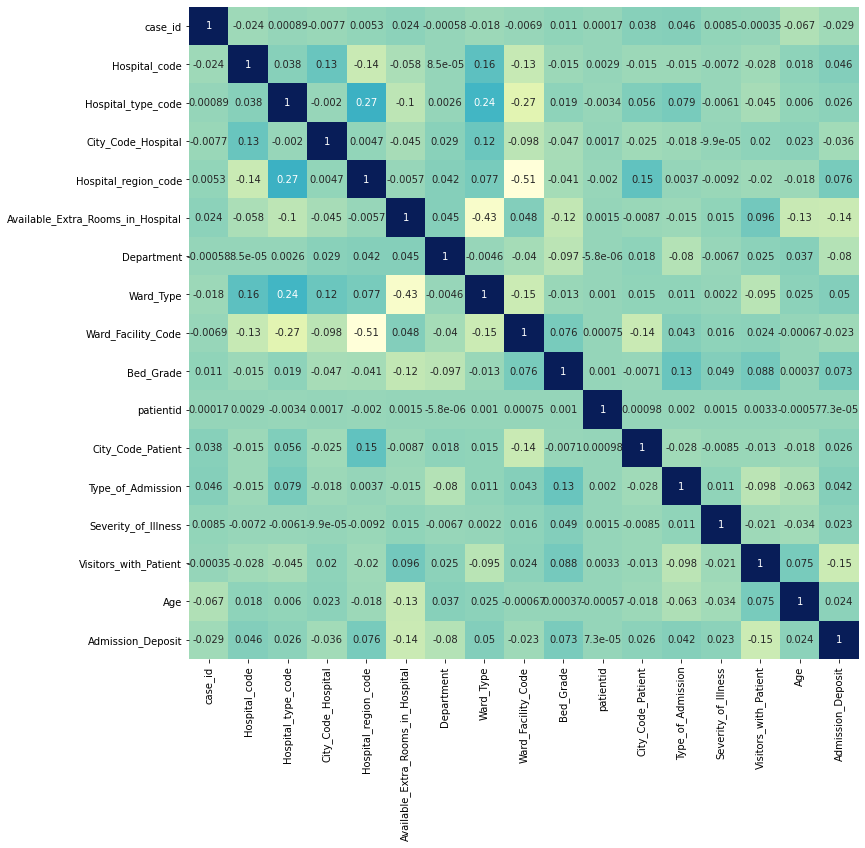

In [56]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(ax=ax, data=df.corr(), cmap="YlGnBu", annot=True, cbar=False)



# Scaling

In [57]:
from sklearn.preprocessing import RobustScaler

In [58]:
df.describe().T

count           mean            std  \
case_id                            448658.0  227441.783724  131536.877150   
Hospital_code                      448658.0      18.331678       8.634201   
Hospital_type_code                 448658.0       1.257421       1.532355   
City_Code_Hospital                 448658.0       4.774171       3.102956   
Hospital_region_code               448658.0       0.780824       0.753062   
Available_Extra_Rooms_in_Hospital  448658.0       3.195184       1.166755   
Department                         448658.0       1.944020       0.561390   
Ward_Type                          448658.0       1.888895       0.804721   
Ward_Facility_Code                 448658.0       3.283314       1.690625   
Bed_Grade                          448658.0       2.625463       0.871420   
patientid                          448658.0   65790.598886   37963.275420   
City_Code_Patient                  448658.0       7.250052       4.758976   
Type_of_Admission                  448658.0       0.784861       0.689286   
Severity_of_Illness                448658.0       1.373998       0.769216   
Visitors_with_Patient              448658.0       3.279928       1.762733   
Age                                448658.0       4.126903       1.890826   
Admission_Deposit                  448658.0    4878.527473    1084.467716   

                                      min        25%       50%        75%  \
case_id                               1.0  113379.25  227138.5  341381.75   
Hospital_code                         1.0      11.00      19.0      26.00   
Hospital_type_code                    0.0       0.00       1.0       2.00   
City_Code_Hospital                    1.0       2.00       5.0       7.00   
Hospital_region_code                  0.0       0.00       1.0       1.00   
Available_Extra_Rooms_in_Hospital     0.0       2.00       3.0       4.00   
Department                            0.0       2.00       2.0       2.00   
Ward_Type                             0.0       1.00       2.0       2.00   
Ward_Facility_Code                    0.0       2.00       4.0       5.00   
Bed_Grade                             1.0       2.00       3.0       3.00   
patientid                             1.0   32876.25   65746.0   98579.00   
City_Code_Patient                     1.0       4.00       8.0       8.00   
Type_of_Admission                     0.0       0.00       1.0       1.00   
Severity_of_Illness                   0.0       1.00       2.0       2.00   
Visitors_with_Patient                 0.0       2.00       3.0       4.00   
Age                                   0.0       3.00       4.0       5.00   
Admission_Deposit                  1800.0    4185.00    4739.0    5406.00   

                                        max  
case_id                            455495.0  
Hospital_code                          32.0  
Hospital_type_code                      6.0  
City_Code_Hospital                     13.0  
Hospital_region_code                    2.0  
Available_Extra_Rooms_in_Hospital      24.0  
Department                              4.0  
Ward_Type                               5.0  
Ward_Facility_Code                      5.0  
Bed_Grade                               4.0  
patientid                          131624.0  
City_Code_Patient                      38.0  
Type_of_Admission                       2.0  
Severity_of_Illness                     2.0  
Visitors_with_Patient                  32.0  
Age                                     9.0  
Admission_Deposit                   11920.0

In [59]:
x = df.drop(['Stay', 'case_id', 'patientid'], axis=1)
y = df.Stay

In [60]:
x[x.columns] = RobustScaler().fit_transform(x[x.columns].values)

# Train-Test split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, stratify=y)

# Classification

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from time import time

In [64]:
values= [RandomForestClassifier(random_state=42), KNeighborsClassifier(), XGBClassifier(random_state=42), MLPClassifier(random_state=42)]

keys= ['RandomForsetClassifier',
      'KNeighborsClassifier',
      'XGBClassifier',
      'MLPClassifier']

models= dict(zip(keys,values))
accuracy_scores=[]
train_times=[]

for key,value in models.items():
  t = time()
  value.fit(x_train,y_train)
  duration = (time() - t) / 60
  y_pred= value.predict(x_test)
  accuracy= accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)
  train_times.append(duration)   
  print(key)
  print(accuracy)

RandomForsetClassifier
0.48782299885585223
KNeighborsClassifier
0.45019985438119436


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:22:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
0.5200151562430348
MLPClassifier
0.5116940816356855


In [65]:
fig = px.bar(accuracy_scores, x=keys, y=accuracy_scores, color=accuracy_scores,
             labels={'x': '', 'y':'Scores %', 'color':''}, height=400, width=500, color_continuous_scale=px.colors.sequential.Sunset)
fig.update_layout(title='Classifiers Accuracy Scores')
fig.show()



In [81]:
fig = px.bar(train_times, x=keys, y=train_times, color=train_times,
             labels={'x': '', 'y':'Train Times (min)', 'color':''}, height=400, width=500, color_continuous_scale=px.colors.sequential.Sunset)
fig.update_layout(title='Classifiers Trainig Times')
fig.show()



In [74]:
params= {'max_depth': [7,8], 'max_features':[8,9,10,11]}

xgb= XGBClassifier(random_state=42)
grid= RandomizedSearchCV(xgb, cv=3, verbose=3,param_distributions= params, n_iter=5)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] max_features=8, max_depth=7 .....................................


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[18:47:08] WARNING: ../src/learner.cc:573: 
Parameters: { "max_features" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:47:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ......... max_features=8, max_depth=7, score=0.517, total=  37.5s
[CV] max_features=8, max_depth=7 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.5s remaining:    0.0s


[18:47:45] WARNING: ../src/learner.cc:573: 
Parameters: { "max_features" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:47:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ......... max_features=8, max_depth=7, score=0.520, total=  37.5s
[CV] max_features=8, max_depth=7 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.3min remaining:    0.0s


[18:48:23] WARNING: ../src/learner.cc:573: 
Parameters: { "max_features" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:48:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ......... max_features=8, max_depth=7, score=0.518, total=  36.9s
[CV] max_features=10, max_depth=7 ....................................
[18:48:59] WARNING: ../src/learner.cc:573: 
Parameters: { "max_features" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
 

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 10.3min finished


[18:57:28] WARNING: ../src/learner.cc:573: 
Parameters: { "max_features" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:57:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, reg_alpha=None,
                            

In [75]:
grid.best_score_

0.5182958669003471

In [76]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              max_features=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
y_pred= grid.best_estimator_.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.5207432502711778


In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        0-10       0.45      0.18      0.26     47435
       11-30       0.49      0.81      0.61     49023
         30+       0.62      0.58      0.59     38140

    accuracy                           0.52    134598
   macro avg       0.52      0.52      0.49    134598
weighted avg       0.51      0.52      0.48    134598



In [79]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for dt')
    plt.show()

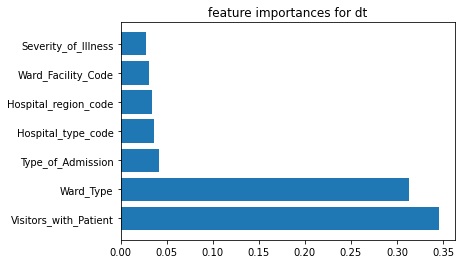

In [80]:
# whatever your features are called
features_names = x_train.columns
f_importances(abs(grid.best_estimator_.feature_importances_), features_names, top=7)

# Colclusion
> it seems like the significant and busiest units of the hospital, where the MAJORITY of patients stay for care, are missing, so this dataset is incomplete, so building a model to predict LOS using it will lead to poor trainig performance